In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read dataset files
df = pd.read_csv('dataset/train.csv')
df.shape

(45528, 19)

In [3]:
# Drop rows with missing values
df = df.dropna(how='any')
df.shape

(43509, 19)

In [4]:
# Drop rows with invalid gender
df = df.loc[df["gender"] != 'XNA']
df.shape

(43508, 19)

In [5]:
# Remove irrelevant columns
df = df.drop(['customer_id', 'name', 'no_of_days_employed'], axis=1)
df.shape

(43508, 16)

In [6]:
df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,F,N,Y,0.0,107934.04,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,M,N,Y,0.0,109862.62,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,M,N,Y,0.0,230153.17,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,F,N,Y,0.0,122325.82,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,M,Y,Y,0.0,387286.00,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [7]:
# Convert gender, owns_car, owns_house, and occupation_type to binary encoding
df = pd.get_dummies(df, columns=["gender", "owns_car", "owns_house", "occupation_type"])
df.head()

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Split features and labels
X = df.drop('credit_card_default', axis=1)
y = df['credit_card_default']
target_names = ["no-default", "default"]

print(X.shape, y.shape)

(43508, 36) (43508,)


In [9]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [11]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Create a Neural Network Model with 1 Hiden Layer

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# Create model and add 1 hiden layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=2, activation='softmax'))

In [15]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3700      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 3,902
Trainable params: 3,902
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train_scaled, 
                    y_train_categorical, 
                    epochs=100,
                    shuffle=True,
                    verbose=2,                    
                    validation_data=(X_test_scaled, y_test_categorical)
                   )

Epoch 1/100
1020/1020 - 1s - loss: 0.0812 - accuracy: 0.9741 - val_loss: 0.0572 - val_accuracy: 0.9789
Epoch 2/100
1020/1020 - 1s - loss: 0.0509 - accuracy: 0.9799 - val_loss: 0.0544 - val_accuracy: 0.9778
Epoch 3/100
1020/1020 - 1s - loss: 0.0491 - accuracy: 0.9803 - val_loss: 0.0550 - val_accuracy: 0.9781
Epoch 4/100
1020/1020 - 1s - loss: 0.0484 - accuracy: 0.9799 - val_loss: 0.0528 - val_accuracy: 0.9773
Epoch 5/100
1020/1020 - 1s - loss: 0.0474 - accuracy: 0.9799 - val_loss: 0.0538 - val_accuracy: 0.9779
Epoch 6/100
1020/1020 - 1s - loss: 0.0466 - accuracy: 0.9804 - val_loss: 0.0539 - val_accuracy: 0.9781
Epoch 7/100
1020/1020 - 1s - loss: 0.0474 - accuracy: 0.9804 - val_loss: 0.0544 - val_accuracy: 0.9762
Epoch 8/100
1020/1020 - 1s - loss: 0.0459 - accuracy: 0.9805 - val_loss: 0.0538 - val_accuracy: 0.9769
Epoch 9/100
1020/1020 - 1s - loss: 0.0455 - accuracy: 0.9812 - val_loss: 0.0548 - val_accuracy: 0.9773
Epoch 10/100
1020/1020 - 1s - loss: 0.0448 - accuracy: 0.9809 - val_loss:

Epoch 80/100
1020/1020 - 1s - loss: 0.0273 - accuracy: 0.9884 - val_loss: 0.0741 - val_accuracy: 0.9742
Epoch 81/100
1020/1020 - 1s - loss: 0.0274 - accuracy: 0.9881 - val_loss: 0.0755 - val_accuracy: 0.9719
Epoch 82/100
1020/1020 - 1s - loss: 0.0271 - accuracy: 0.9885 - val_loss: 0.0758 - val_accuracy: 0.9738
Epoch 83/100
1020/1020 - 1s - loss: 0.0286 - accuracy: 0.9885 - val_loss: 0.0735 - val_accuracy: 0.9734
Epoch 84/100
1020/1020 - 1s - loss: 0.0265 - accuracy: 0.9891 - val_loss: 0.0765 - val_accuracy: 0.9736
Epoch 85/100
1020/1020 - 1s - loss: 0.0264 - accuracy: 0.9883 - val_loss: 0.0777 - val_accuracy: 0.9737
Epoch 86/100
1020/1020 - 1s - loss: 0.0260 - accuracy: 0.9889 - val_loss: 0.0775 - val_accuracy: 0.9755
Epoch 87/100
1020/1020 - 1s - loss: 0.0266 - accuracy: 0.9884 - val_loss: 0.0781 - val_accuracy: 0.9738
Epoch 88/100
1020/1020 - 1s - loss: 0.0259 - accuracy: 0.9891 - val_loss: 0.0789 - val_accuracy: 0.9746
Epoch 89/100
1020/1020 - 1s - loss: 0.0257 - accuracy: 0.9890 - 

### Create a Deep Learning Model with 2 Hiden Layers

In [18]:
# Create model and add two hiden layers
deep_model = Sequential()
deep_model.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
deep_model.add(Dense(units=100, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [19]:
# Compile and fit the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               3700      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 14,002
Trainable params: 14,002
Non-trainable params: 0
_________________________________________________________________


In [21]:
deep_history = deep_model.fit(X_train_scaled, 
                    y_train_categorical, 
                    epochs=100,
                    shuffle=True,
                    verbose=2,                    
                    validation_data=(X_test_scaled, y_test_categorical)
                   )

Epoch 1/100
1020/1020 - 1s - loss: 0.0737 - accuracy: 0.9772 - val_loss: 0.0568 - val_accuracy: 0.9776
Epoch 2/100
1020/1020 - 1s - loss: 0.0525 - accuracy: 0.9793 - val_loss: 0.0575 - val_accuracy: 0.9786
Epoch 3/100
1020/1020 - 1s - loss: 0.0489 - accuracy: 0.9797 - val_loss: 0.0551 - val_accuracy: 0.9776
Epoch 4/100
1020/1020 - 1s - loss: 0.0473 - accuracy: 0.9805 - val_loss: 0.0573 - val_accuracy: 0.9753
Epoch 5/100
1020/1020 - 1s - loss: 0.0464 - accuracy: 0.9805 - val_loss: 0.0541 - val_accuracy: 0.9778
Epoch 6/100
1020/1020 - 1s - loss: 0.0455 - accuracy: 0.9805 - val_loss: 0.0551 - val_accuracy: 0.9783
Epoch 7/100
1020/1020 - 1s - loss: 0.0442 - accuracy: 0.9814 - val_loss: 0.0543 - val_accuracy: 0.9782
Epoch 8/100
1020/1020 - 1s - loss: 0.0430 - accuracy: 0.9811 - val_loss: 0.0545 - val_accuracy: 0.9770
Epoch 9/100
1020/1020 - 1s - loss: 0.0423 - accuracy: 0.9815 - val_loss: 0.0570 - val_accuracy: 0.9778
Epoch 10/100
1020/1020 - 1s - loss: 0.0416 - accuracy: 0.9816 - val_loss:

Epoch 80/100
1020/1020 - 1s - loss: 0.0066 - accuracy: 0.9974 - val_loss: 0.2429 - val_accuracy: 0.9716
Epoch 81/100
1020/1020 - 1s - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.2623 - val_accuracy: 0.9709
Epoch 82/100
1020/1020 - 1s - loss: 0.0084 - accuracy: 0.9965 - val_loss: 0.2612 - val_accuracy: 0.9704
Epoch 83/100
1020/1020 - 1s - loss: 0.0071 - accuracy: 0.9972 - val_loss: 0.2449 - val_accuracy: 0.9720
Epoch 84/100
1020/1020 - 1s - loss: 0.0069 - accuracy: 0.9973 - val_loss: 0.2360 - val_accuracy: 0.9709
Epoch 85/100
1020/1020 - 1s - loss: 0.0067 - accuracy: 0.9974 - val_loss: 0.2519 - val_accuracy: 0.9696
Epoch 86/100
1020/1020 - 1s - loss: 0.0082 - accuracy: 0.9968 - val_loss: 0.2541 - val_accuracy: 0.9702
Epoch 87/100
1020/1020 - 1s - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.2563 - val_accuracy: 0.9705
Epoch 88/100
1020/1020 - 1s - loss: 0.0052 - accuracy: 0.9979 - val_loss: 0.2505 - val_accuracy: 0.9696
Epoch 89/100
1020/1020 - 1s - loss: 0.0064 - accuracy: 0.9974 - 

### Quantify the Trained Model

In [22]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

340/340 - 0s - loss: 0.0876 - accuracy: 0.9750
Normal Neural Network - Loss: 0.08756532520055771, Accuracy: 0.974993109703064


In [23]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

340/340 - 0s - loss: 0.2869 - accuracy: 0.9718
Normal Neural Network - Loss: 0.2869296967983246, Accuracy: 0.9717752933502197


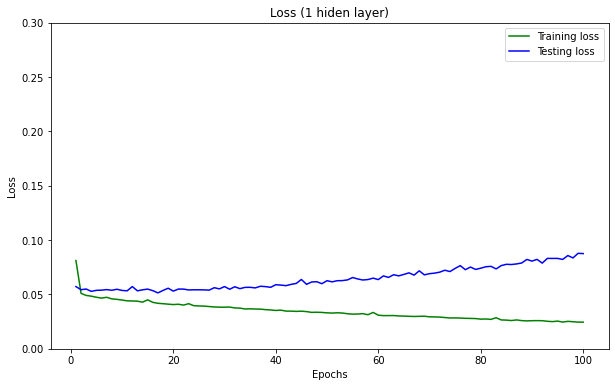

In [24]:
# plot loss for 1 hiden layer

loss_train = history.history['loss']
loss_test = history.history['val_loss']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_test, 'b', label='Testing loss')
plt.title('Loss (1 hiden layer)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.legend()
plt.show()

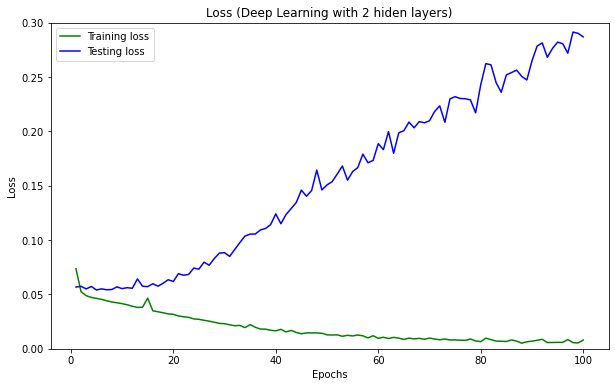

In [25]:
# plot loss with 2 hiden layers
deep_loss_train = deep_history.history['loss']
deep_loss_test = deep_history.history['val_loss']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, deep_loss_train, 'g', label='Training loss')
plt.plot(epochs, deep_loss_test, 'b', label='Testing loss')
plt.title('Loss (Deep Learning with 2 hiden layers)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,0.3)
plt.legend()
plt.show()

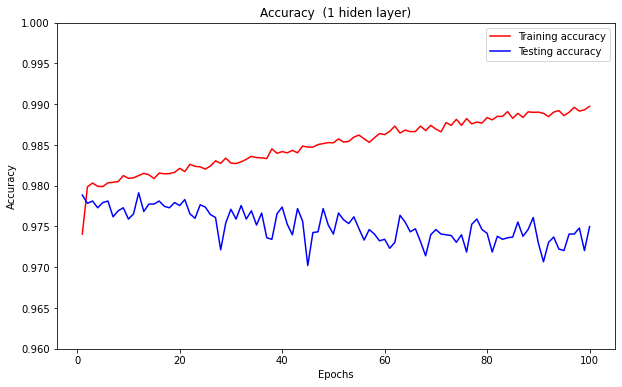

In [26]:
# plot accuracy with 1 hiden layer
accuracy_train = history.history['accuracy']
accuracy_test = history.history['val_accuracy']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, accuracy_test, 'b', label='Testing accuracy')
plt.title('Accuracy  (1 hiden layer)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.96,1)
plt.legend()
plt.show()

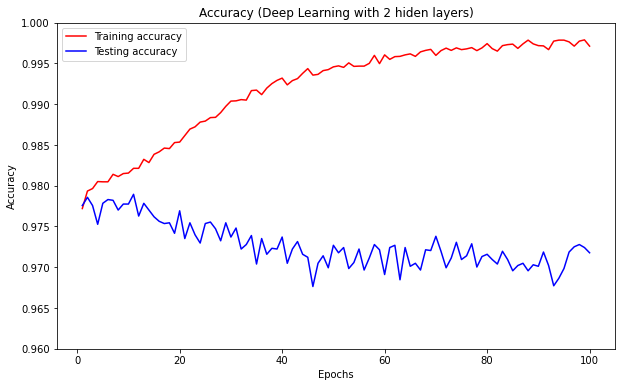

In [27]:
# plot accuracy with 2 hiden layers
deep_accuracy_train = deep_history.history['accuracy']
deep_accuracy_test = deep_history.history['val_accuracy']
epochs = range(1,101)
plt.figure(figsize=(10,6))
plt.plot(epochs, deep_accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, deep_accuracy_test, 'b', label='Testing accuracy')
plt.title('Accuracy (Deep Learning with 2 hiden layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.96,1)
plt.legend()
plt.show()